In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
data=pd.read_csv('Loan_Default.csv')
print('Set up complete')

Set up complete


In [8]:
print(data.isnull().sum())

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [9]:
#Deleting NULL values of income, property_value, loan_purpose, dtir1 
#income: A missing income value means we have no idea about the borrower's financial status, which is crucial for loan default prediction.
#property_value: Since property value can significantly impact loan risk, dropping missing values avoids assumptions.
#loan_purpose: The reason for taking a loan can influence default risk. If missing, it's unclear how to categorize it.
#dtir1: Debt-to-Income Ratio is a key financial metric. If missing, the risk assessment may be incorrect.
data = data.dropna(subset=['income', 'property_value', 'loan_purpose', 'dtir1'])

In [10]:
data["rate_of_interest"].fillna(data["rate_of_interest"].mean(), inplace=True)
print(data['rate_of_interest'].isnull().sum())

0


/var/folders/br/ng89_vjs55b9fqgsky6n1_9m0000gn/T/ipykernel_5249/2193616288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["rate_of_interest"].fillna(data["rate_of_interest"].mean(), inplace=True)


In [11]:
data.to_csv("Cleaned_Loan.csv")
print("Cleaning complete")

Cleaning complete


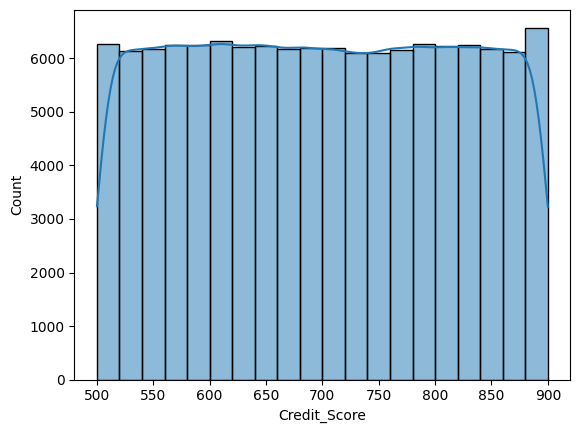

In [14]:
sns.histplot(data["Credit_Score"], bins=20, kde=True)
plt.show()

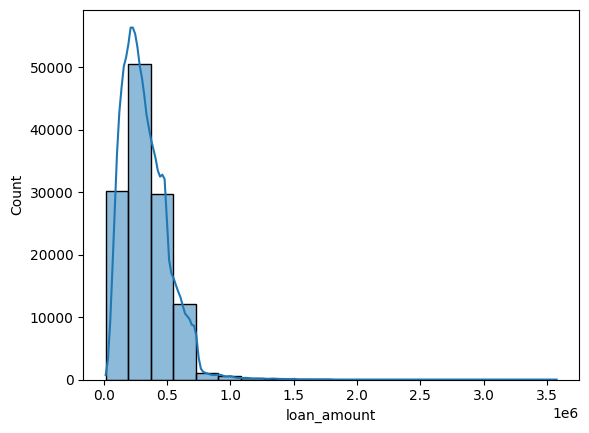

In [15]:
sns.histplot(data["loan_amount"], bins=20, kde=True)
plt.show()

Status
0    104019
1     20309
Name: count, dtype: int64


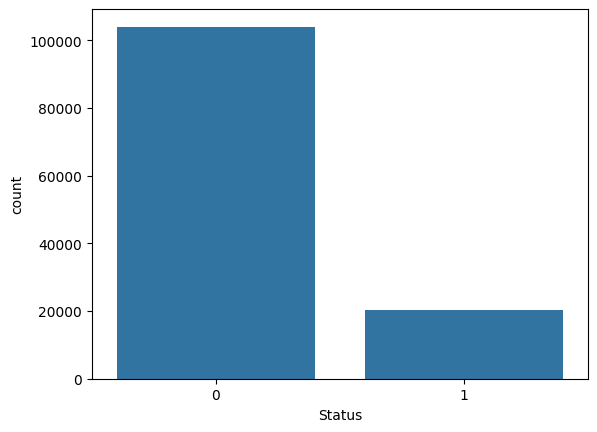

In [16]:
print(data["Status"].value_counts())  # Status = Target column (1 = Default, 0 = No Default)
sns.countplot(x="Status", data=data)
plt.show()

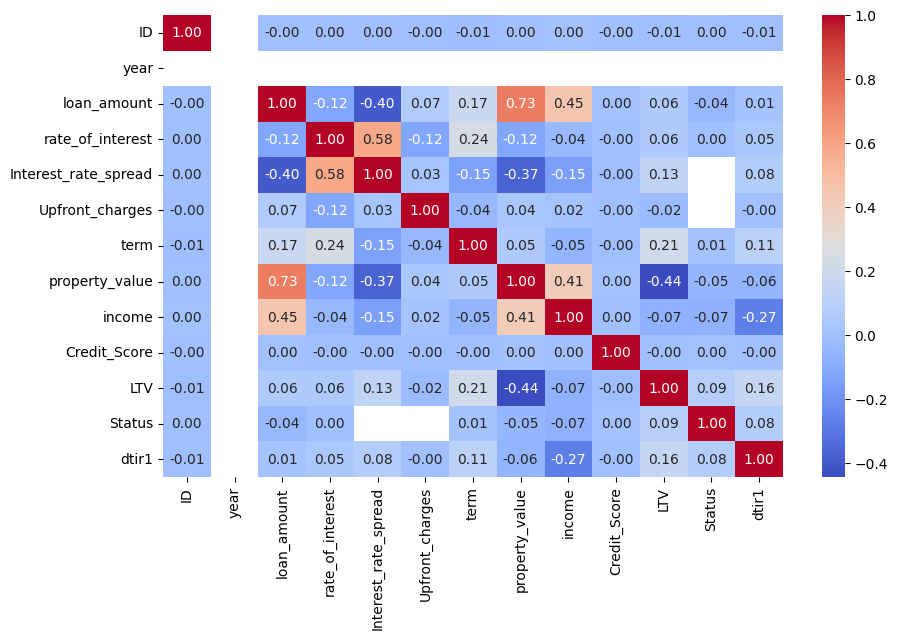

In [17]:
numeric_data = data.select_dtypes(include=['number'])  
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
#interpretation from heatmap
# Correlation values range from -1 to 1:
# +1.0 (Red) → Strong positive correlation (as one increases, the other increases).
# 0.0 (Blue/White) → No correlation (no relationship).
# -1.0 (Dark Blue) → Strong negative correlation (as one increases, the other decreases).

#Loan Amount & Property Value (0.73 - Strong Positive Correlation)
#Higher property values are linked to larger loan amounts.

#Interest Rate & Interest Rate Spread (0.58 - Moderate Positive Correlation)
#Higher interest rates tend to have a higher interest rate spread.

#LTV & Property Value (-0.44 - Moderate Negative Correlation)
#Higher Loan-to-Value (LTV) ratios are associated with lower property values.

#Income & dtir1 (-0.27 - Weak Negative Correlation)
#Higher debt-to-income ratios (DTI) are linked to lower incomes.

#"Status" has weak correlations with other variables.
#No feature seems to have a strong direct influence on defaults.

In [18]:
pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to "Credit_Worthiness"
data["Credit_Worthiness"] = label_encoder.fit_transform(data["Credit_Worthiness"])

In [20]:
data = pd.get_dummies(data, columns=["loan_purpose", "loan_type", "Region"], drop_first=True)
print(data.head())

      ID  year loan_limit             Gender approv_in_adv  Credit_Worthiness  \
0  24890  2019         cf  Sex Not Available         nopre                  0   
2  24892  2019         cf               Male           pre                  0   
3  24893  2019         cf               Male         nopre                  0   
4  24894  2019         cf              Joint           pre                  0   
5  24895  2019         cf              Joint           pre                  0   

  open_credit business_or_commercial  loan_amount  rate_of_interest  ...  \
0        nopc                  nob/c       116500          4.090666  ...   
2        nopc                  nob/c       406500          4.560000  ...   
3        nopc                  nob/c       456500          4.250000  ...   
4        nopc                  nob/c       696500          4.000000  ...   
5        nopc                  nob/c       706500          3.990000  ...   

   Status  dtir1  loan_purpose_p2 loan_purpose_p3 loan_p

In [21]:
data = data.drop(columns=["ID", "year", "loan_limit", "Gender", "approv_in_adv", "business_or_commercial", "open_credit"])
print("Deleting complete")

Deleting complete


In [22]:
print(data.head())

   Credit_Worthiness  loan_amount  rate_of_interest  Interest_rate_spread  \
0                  0       116500          4.090666                   NaN   
2                  0       406500          4.560000                0.2000   
3                  0       456500          4.250000                0.6810   
4                  0       696500          4.000000                0.3042   
5                  0       706500          3.990000                0.1523   

   Upfront_charges   term Neg_ammortization interest_only lump_sum_payment  \
0              NaN  360.0           not_neg       not_int         not_lpsm   
2            595.0  360.0           neg_amm       not_int         not_lpsm   
3              NaN  360.0           not_neg       not_int         not_lpsm   
4              0.0  360.0           not_neg       not_int         not_lpsm   
5            370.0  360.0           not_neg       not_int         not_lpsm   

   property_value  ... Status dtir1 loan_purpose_p2 loan_purpose_p3 

In [23]:
data["Neg_ammortization"] = label_encoder.fit_transform(data["Neg_ammortization"])
data = pd.get_dummies(data, columns=["interest_only", "lump_sum_payment"], drop_first=True)
print(data.head())

   Credit_Worthiness  loan_amount  rate_of_interest  Interest_rate_spread  \
0                  0       116500          4.090666                   NaN   
2                  0       406500          4.560000                0.2000   
3                  0       456500          4.250000                0.6810   
4                  0       696500          4.000000                0.3042   
5                  0       706500          3.990000                0.1523   

   Upfront_charges   term  Neg_ammortization  property_value  \
0              NaN  360.0                  1        118000.0   
2            595.0  360.0                  0        508000.0   
3              NaN  360.0                  1        658000.0   
4              0.0  360.0                  1        758000.0   
5            370.0  360.0                  1       1008000.0   

  construction_type occupancy_type  ... loan_purpose_p2 loan_purpose_p3  \
0                sb             pr  ...           False           False   
2 

In [ ]:
#Upfront_charges change
data["Upfront_charges"].fillna(data["Upfront_charges"].mean(), inplace=True)
print(data['Upfront_charges'].isnull().sum())

0


/var/folders/br/ng89_vjs55b9fqgsky6n1_9m0000gn/T/ipykernel_5249/2583172764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Upfront_charges"].fillna(data["Upfront_charges"].mean(), inplace=True)


In [25]:
#Interest_rate_spread
print(data["Interest_rate_spread"].describe())


count    104019.000000
mean          0.472205
std           0.485681
min          -3.638000
25%           0.108300
50%           0.404800
75%           0.784900
max           3.357000
Name: Interest_rate_spread, dtype: float64


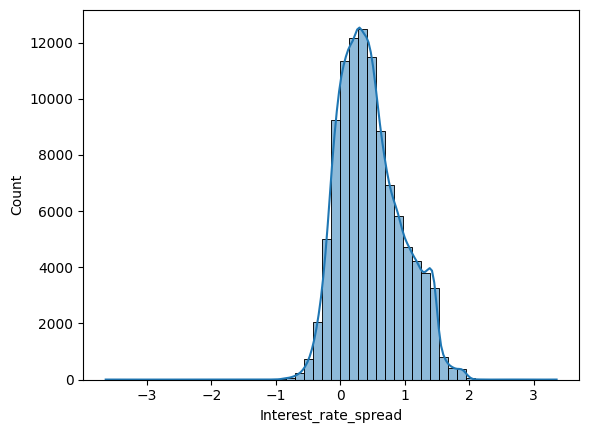

In [26]:
sns.histplot(data["Interest_rate_spread"], bins=50, kde=True)
plt.show()

In [27]:
data["Interest_rate_spread"].fillna(data["Interest_rate_spread"].median(), inplace=True)

/var/folders/br/ng89_vjs55b9fqgsky6n1_9m0000gn/T/ipykernel_5249/2724521792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Interest_rate_spread"].fillna(data["Interest_rate_spread"].median(), inplace=True)


In [28]:
print(data.head())

   Credit_Worthiness  loan_amount  rate_of_interest  Interest_rate_spread  \
0                  0       116500          4.090666                0.4048   
2                  0       406500          4.560000                0.2000   
3                  0       456500          4.250000                0.6810   
4                  0       696500          4.000000                0.3042   
5                  0       706500          3.990000                0.1523   

   Upfront_charges   term  Neg_ammortization  property_value  \
0      3382.653392  360.0                  1        118000.0   
2       595.000000  360.0                  0        508000.0   
3      3382.653392  360.0                  1        658000.0   
4         0.000000  360.0                  1        758000.0   
5       370.000000  360.0                  1       1008000.0   

  construction_type occupancy_type  ... loan_purpose_p2 loan_purpose_p3  \
0                sb             pr  ...           False           False   
2 

In [30]:
data["construction_type"] = label_encoder.fit_transform(data["Neg_ammortization"])
data = pd.get_dummies(data, columns=["occupancy_type"], drop_first=True)
print(data.head())

   Credit_Worthiness  loan_amount  rate_of_interest  Interest_rate_spread  \
0                  0       116500          4.090666                0.4048   
2                  0       406500          4.560000                0.2000   
3                  0       456500          4.250000                0.6810   
4                  0       696500          4.000000                0.3042   
5                  0       706500          3.990000                0.1523   

   Upfront_charges   term  Neg_ammortization  property_value  \
0      3382.653392  360.0                  1        118000.0   
2       595.000000  360.0                  0        508000.0   
3      3382.653392  360.0                  1        658000.0   
4         0.000000  360.0                  1        758000.0   
5       370.000000  360.0                  1       1008000.0   

   construction_type Secured_by  ... loan_purpose_p4  loan_type_type2  \
0                  1       home  ...           False            False   
2     

In [31]:
print(data.dtypes)

Credit_Worthiness              int64
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization              int64
property_value               float64
construction_type              int64
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
LTV                          float64
Security_Type                 object
Status                         int64
dtir1                        float64
loan_purpose_p2                 bool
loan_purpose_p3                 bool
loan_purpose_p4                 bool
loan_type_type2                 bool
loan_type_type3                 bool
Region_North-East               bool
R

In [36]:
print(data.columns)


Index(['Credit_Worthiness', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'property_value', 'construction_type', 'income', 'Credit_Score', 'age',
       'submission_of_application', 'LTV', 'Status', 'dtir1',
       'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'loan_type_type2', 'loan_type_type3', 'Region_North-East',
       'Region_central', 'Region_south', 'interest_only_not_int',
       'lump_sum_payment_not_lpsm', 'occupancy_type_pr', 'occupancy_type_sr',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'Security_Type_direct',
       'Secured_by_land', 'total_units_2U', 'total_units_3U',
       'total_units_4U'],
      dtype='object')


In [ ]:
data = pd.get_dummies(data, columns=[col for col in ["credit_type", "co-applicant_credit_type", "Security_Type", "Secured_by", "total_units"] if col in data.columns], drop_first=True)

In [38]:
data["age"] = label_encoder.fit_transform(data["age"])
data["submission_of_application"] = label_encoder.fit_transform(data["submission_of_application"])

In [39]:
print(data.columns)

Index(['Credit_Worthiness', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'property_value', 'construction_type', 'income', 'Credit_Score', 'age',
       'submission_of_application', 'LTV', 'Status', 'dtir1',
       'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'loan_type_type2', 'loan_type_type3', 'Region_North-East',
       'Region_central', 'Region_south', 'interest_only_not_int',
       'lump_sum_payment_not_lpsm', 'occupancy_type_pr', 'occupancy_type_sr',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'Security_Type_direct',
       'Secured_by_land', 'total_units_2U', 'total_units_3U',
       'total_units_4U'],
      dtype='object')


In [40]:
print(data.head())

   Credit_Worthiness  loan_amount  rate_of_interest  Interest_rate_spread  \
0                  0       116500          4.090666                0.4048   
2                  0       406500          4.560000                0.2000   
3                  0       456500          4.250000                0.6810   
4                  0       696500          4.000000                0.3042   
5                  0       706500          3.990000                0.1523   

   Upfront_charges   term  Neg_ammortization  property_value  \
0      3382.653392  360.0                  1        118000.0   
2       595.000000  360.0                  0        508000.0   
3      3382.653392  360.0                  1        658000.0   
4         0.000000  360.0                  1        758000.0   
5       370.000000  360.0                  1       1008000.0   

   construction_type   income  ...  occupancy_type_sr  credit_type_CRIF  \
0                  1   1740.0  ...              False             False   
2 

In [42]:
print(data.dtypes)

Credit_Worthiness                 int64
loan_amount                       int64
rate_of_interest                float64
Interest_rate_spread            float64
Upfront_charges                 float64
term                            float64
Neg_ammortization                 int64
property_value                  float64
construction_type                 int64
income                          float64
Credit_Score                      int64
age                               int64
submission_of_application         int64
LTV                             float64
Status                            int64
dtir1                           float64
loan_purpose_p2                    bool
loan_purpose_p3                    bool
loan_purpose_p4                    bool
loan_type_type2                    bool
loan_type_type3                    bool
Region_North-East                  bool
Region_central                     bool
Region_south                       bool
interest_only_not_int              bool


In [44]:
data.to_csv("Final_Loan.csv")
print("Cleaning & Processing complete")

Cleaning & Processing complete


In [46]:
#Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Status"])  # All features except the target
y = data["Status"]  # Target variable (loan default status)

#80% for training (X_train, y_train)
#20% for testing (X_test, y_test)
#random_state=42 ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data:", X_test.shape, y_test.shape)

Training Data: (99462, 36) (99462,)
Testing Data: (24866, 36) (24866,)


In [48]:
#Simple Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
print("Importing libraries complete.")

Importing libraries complete.


In [50]:
print(X_train.isnull().sum().sum())  # Total NaN values in training set
print(X_test.isnull().sum().sum())   # Total NaN values in test set

23
6


In [51]:
#Logistic Regression cannot handle missing values
# Fill missing values with median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [52]:
# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)
#By default, logistic regression might not converge on large datasets, so increasing iterations ensures better training.

# Train the model
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [53]:
#Predict on the test set
y_pred = model.predict(X_test)

In [54]:
#Evaluate Model Performance

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8365
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     20800
           1       1.00      0.00      0.00      4066

    accuracy                           0.84     24866
   macro avg       0.92      0.50      0.46     24866
weighted avg       0.86      0.84      0.76     24866



In [ ]:
#Model achieved 83.65% accuracy

#Recall for Class 1 (Defaults) is 0.00, meaning the model never correctly identifies defaults.
#Precision for Class 1 is 1.00, meaning the few times it predicts a default, it’s correct—but that’s not happening often.
#This means the model is biased towards "No Default" cases.

#Dataset has imbalanced classes: 20,800 (Class 0: No Default) & 4,066 (Class 1: Default)
#Since "No Default" cases dominate, the model is just predicting "No Default" for most cases to maximize accuracy.

In [55]:
#To handle class imbalance
#Class Weighting

model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8365
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     20800
           1       1.00      0.00      0.00      4066

    accuracy                           0.84     24866
   macro avg       0.92      0.50      0.46     24866
weighted avg       0.86      0.84      0.76     24866



In [57]:
#The dataset is too imbalanced.
#Logistic Regression is not strong enough to handle imbalanced data properly.
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with class weighting to handle imbalance
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
#class_weight="balanced" for more importance to the minority class (Defaults).
#n_estimators=100 for 100 decision trees

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [59]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20800
           1       1.00      1.00      1.00      4066

    accuracy                           1.00     24866
   macro avg       1.00      1.00      1.00     24866
weighted avg       1.00      1.00      1.00     24866



In [60]:
#The accuracy 100 is not OK. It'sperfectly predicting all cases, which usually means overfitting has happened.
#Fixing overfitting
#Limit Tree Depth
model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [61]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20800
           1       1.00      1.00      1.00      4066

    accuracy                           1.00     24866
   macro avg       1.00      1.00      1.00     24866
weighted avg       1.00      1.00      1.00     24866



In [62]:
#Still 100

#Check for leakage
import pandas as pd

# Add the target column back temporarily for correlation check
temp_data = X_train.copy()
temp_data["Status"] = y_train

# Check correlation
correlation = temp_data.corr()["Status"].sort_values(ascending=False)
print(correlation)

Status                          1.000000
submission_of_application       0.130290
loan_type_type2                 0.121435
LTV                             0.092080
dtir1                           0.080808
age                             0.047179
loan_purpose_p2                 0.034967
Secured_by_land                 0.033667
Region_south                    0.033560
loan_purpose_p3                 0.027730
total_units_2U                  0.025583
Credit_Worthiness               0.024839
Region_central                  0.023127
loan_type_type3                 0.016513
total_units_3U                  0.015853
Region_North-East               0.014290
term                            0.009636
credit_type_EXP                 0.007454
occupancy_type_sr               0.005748
Credit_Score                    0.004899
credit_type_EQUI                0.004084
total_units_4U                  0.003710
credit_type_CRIF                0.002015
rate_of_interest                0.000160
Upfront_charges 

In [ ]:
#Correlation is not the issue as
#No feature has a correlation above 0.9 --> No obvious data leakage from numerical relationships.
#The highest correlation (0.13 for submission_of_application) is weak but it's not related to status.
#Something else is causing overfitting

In [63]:
print("Is 'Status' in X_train?", "Status" in X_train.columns)

Is 'Status' in X_train? False


In [64]:
#False means the issue is not coming from accidentally training on the target variable.
#Check for duplicates rows.
duplicates = X_train.merge(X_test, how="inner")
print(f"Number of identical rows in training & test sets: {len(duplicates)}")

Number of identical rows in training & test sets: 0


In [65]:
#Train simplier model
model = RandomForestClassifier(
    n_estimators=10,  # Fewer trees
    max_depth=3,  # Very shallow trees
    max_features=5,  # Use fewer features per split
    class_weight="balanced", 
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=5,
                       n_estimators=10, random_state=42)

In [66]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8716
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     20800
           1       0.56      1.00      0.72      4066

    accuracy                           0.87     24866
   macro avg       0.78      0.92      0.82     24866
weighted avg       0.93      0.87      0.88     24866



In [67]:
#Accuracy: 87.16%
#Recall for Defaults (Class 1): 1.00 --> Detecting all default cases
#Precision for Defaults: 0.56 means that it sometimes falsely predicts defaults.
#Some "No Default" cases are being misclassified as defaults.

#Gonna do Fine-Tuning to imporve decision
model = RandomForestClassifier(
    n_estimators=10,
    max_depth=5,  # Slightly deeper trees
    max_features=5,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       n_estimators=10, random_state=42)

In [68]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9729
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20800
           1       0.86      1.00      0.92      4066

    accuracy                           0.97     24866
   macro avg       0.93      0.98      0.95     24866
weighted avg       0.98      0.97      0.97     24866



In [ ]:
#The model detects all default cases (recall = 1.00)
#Precision has improved from 0.56 to 0.86, meaning fewer false alarms.

#Final Summary of the Model
#Accuracy: 97.29%
#Recall for Defaults: 1.00 (Catches all default cases!)
#Precision for Defaults: 0.86 (Much fewer false alarms!)
#Balanced F1-score: 0.92 (Good trade-off between precision & recall!)

In [69]:
import joblib
# Save the trained model
joblib.dump(model, "loan_default_model_RandomForest_Test.pkl")

# Load it later for predictions
# model = joblib.load("loan_default_model.pkl")


['loan_default_model_RandomForest_Test.pkl']

In [70]:
#Predict default status for new data
new_data = X_test.iloc[:5]  # Take first 5 rows from test set
predictions = model.predict(new_data)

print(predictions)  # Output: 0 (No Default) or 1 (Default)


[0 0 0 0 0]
